In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trans_df=pd.read_csv('../data/transactions_cleaned.csv')

trans_df['high_amount_risk']=trans_df['amt'].apply(lambda x: 1 if x>200 else 0)

print(trans_df['high_amount_risk'].value_counts())

high_amount_risk
0    530370
1     25349
Name: count, dtype: int64


In [3]:
trans_df['night_risk']=trans_df['trans_hour'].apply(lambda x: 1 if x>=0 and x<=6 else 0)

In [4]:
trans_df['txn_per_card'] = trans_df.groupby('cc_num')['cc_num'].transform('count')


In [5]:
trans_df['freq_risk'] = trans_df['txn_per_card'].apply(lambda x: 1 if x>50 else 0)


In [6]:
state_count = trans_df.groupby('cc_num')['state'].transform('nunique')
trans_df['location_risk'] = state_count.apply(lambda x: 1 if x>3 else 0)


In [7]:
trans_df['risk_score'] = (
    trans_df['high_amount_risk'] +
    trans_df['night_risk'] +
    trans_df['freq_risk'] +
    trans_df['location_risk']
)

risk_score_count = trans_df[trans_df['is_fraud']==1].groupby('risk_score').size()

In [8]:
print(risk_score_count)

risk_score
0      17
1     435
2    1153
3     540
dtype: int64


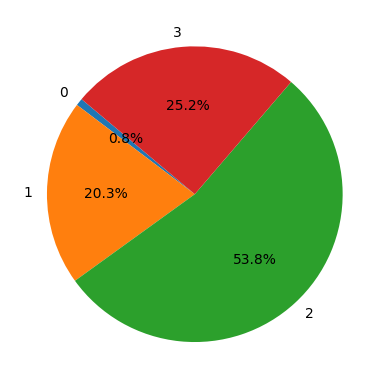

In [ ]:
risk_score_labels=risk_score_count.index.astype(str)

plt.pie(risk_score_count, labels=risk_score_labels, explode=[0.1 if label=='4' else 0 for label in risk_score_labels], autopct='%1.1f%%', startangle=140)

plt.show()